<a href="https://colab.research.google.com/github/puneethegde72/Image-Identification/blob/main/Fake%20and%20real%20galaxy%20image%20identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Extract the dataset from the zip file
with zipfile.ZipFile('Group_Project_Data 2.zip', 'r') as zip_ref:
    zip_ref.extractall('Group_Project_Data')

# New Section

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/Group_Project_Data/Group_Project_Data/Valid'
test_dir = '/content/Group_Project_Data/Group_Project_Data/Train'

In [ ]:
valid = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=64,
                                                    class_mode='binary')
test = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=64,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(valid,
                    steps_per_epoch=valid.samples // valid.batch_size,
                    epochs=50,
                    validation_data=test,
                    validation_steps=test.samples // test.batch_size)

Epoch 1/50
31/31 [==============================] - 29s 529ms/step - loss: 0.5738 - accuracy: 0.7634 - val_loss: 0.3440 - val_accuracy: 0.8602
Epoch 2/50
31/31 [==============================] - 16s 512ms/step - loss: 0.2022 - accuracy: 0.9613 - val_loss: 0.0414 - val_accuracy: 0.9899
Epoch 3/50
31/31 [==============================] - 16s 537ms/step - loss: 0.0627 - accuracy: 0.9861 - val_loss: 0.0157 - val_accuracy: 0.9941
Epoch 4/50
31/31 [==============================] - 16s 522ms/step - loss: 0.0320 - accuracy: 0.9923 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 5/50
31/31 [==============================] - 16s 507ms/step - loss: 0.0362 - accuracy: 0.9912 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 6/50
31/31 [==============================] - 17s 540ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 7/50
31/31 [==============================] - 17s 539ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0050 - val_accuracy: 0.9990

In [ ]:
model.save('galaxy_classifier.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Text(0.5, 1.0, 'Training and Validation Loss')

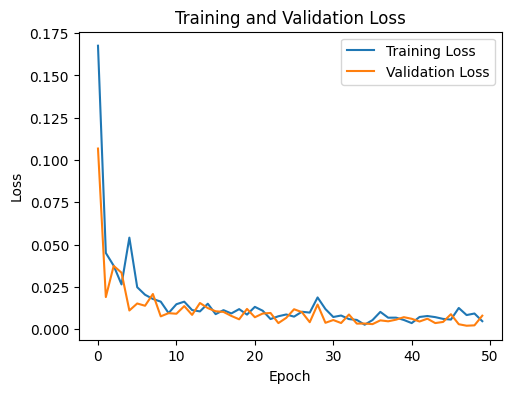

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

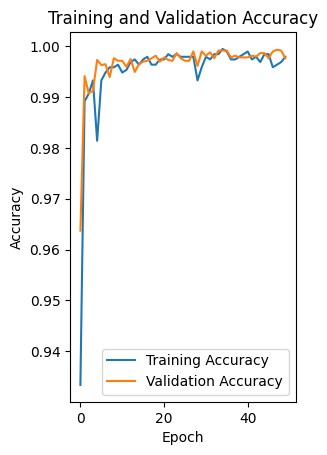

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
test_images, test_labels = next(test)
test_pred = model.predict(test_images)

2/2 [==============================] - 0s 9ms/step


In [ ]:
test_images

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.03921569, 0.03921569, 0.03921569],
         [0.03921569, 0.03921569, 0.03921569]],

        [[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.03921569, 0.03921569, 0.03921569],
         [0.03921569, 0.03921569, 0.03921569]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.03137255, 0.03137255, 0.03137255],
         [0.03137255, 0.03137255, 0.03137255]],

        ...,

        [[0.03921569, 0.03921569, 0.03921569],
         [0.03921569, 0.03921569, 0.03921569]

In [ ]:
test_labels

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.], dtype=float32)

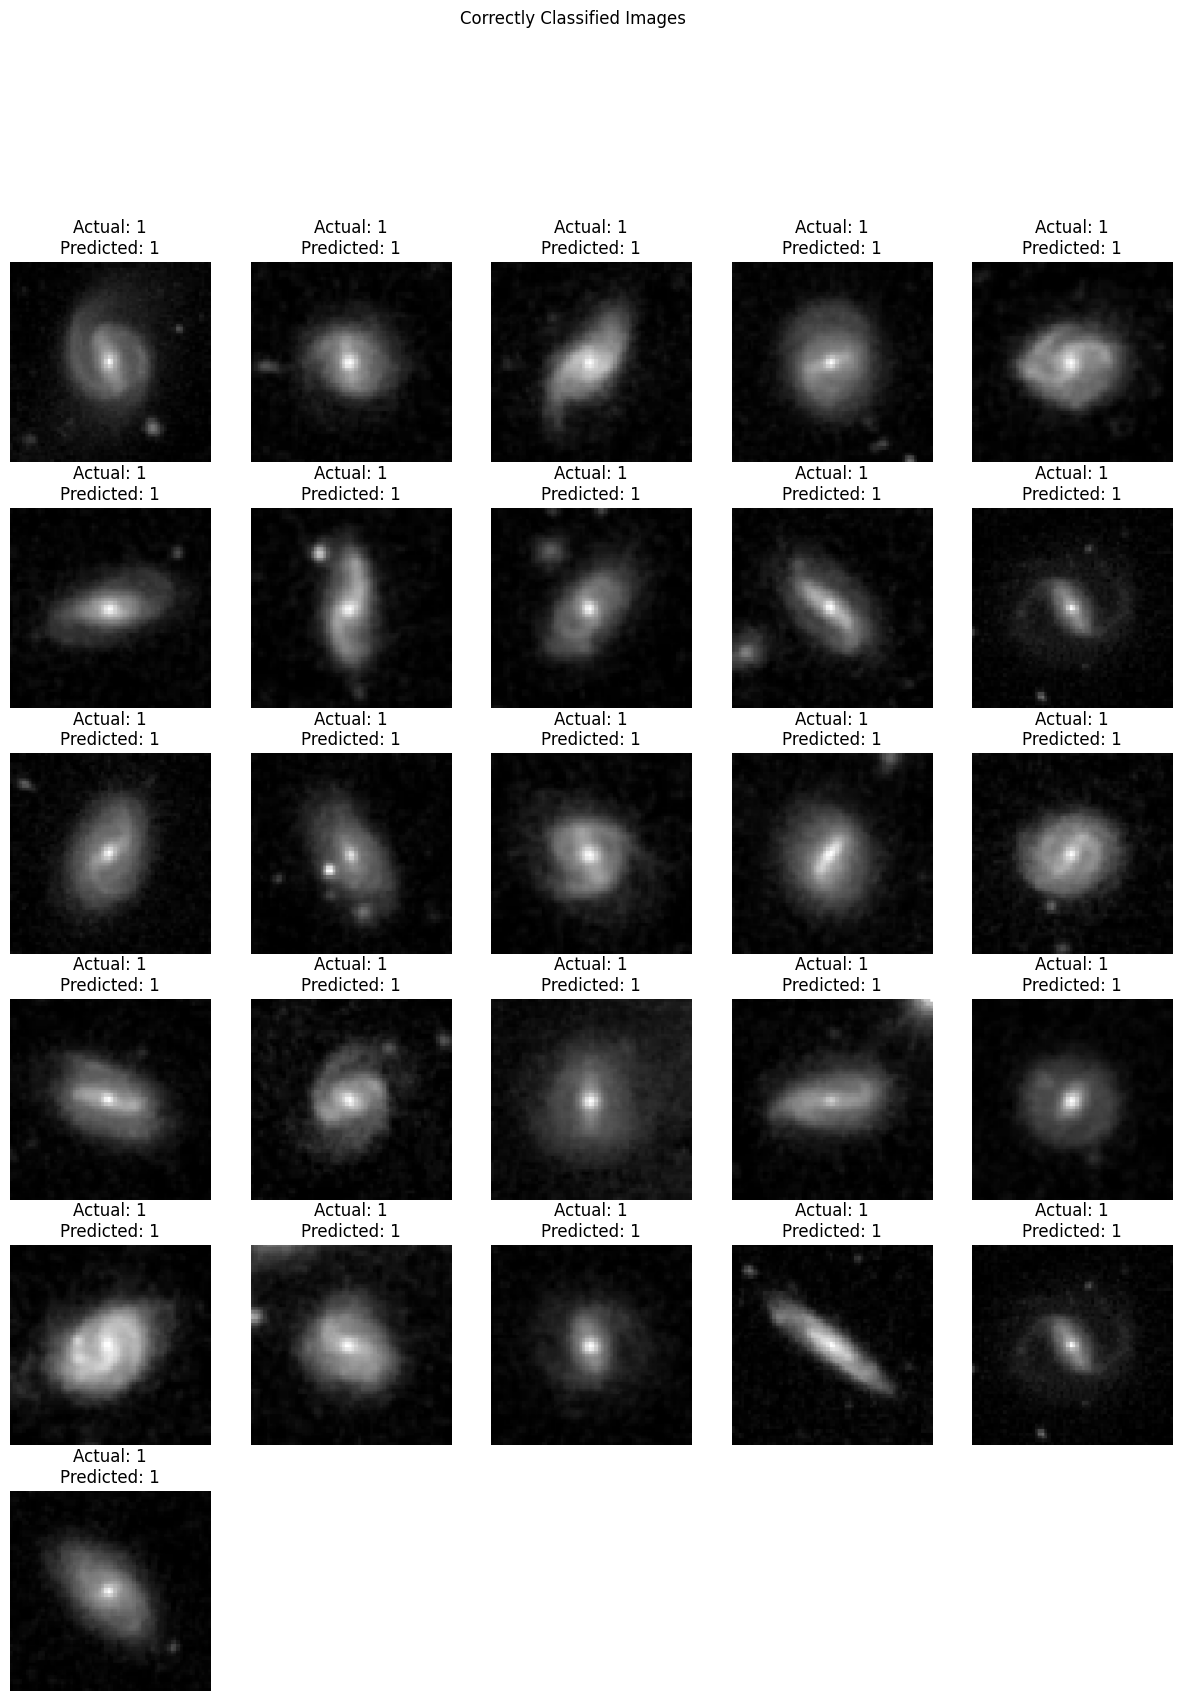

In [ ]:
correct_idx = np.where(test_pred[:, 0] == test_labels)[0]
plt.figure(figsize=(15, 25))
for i, idx in enumerate(correct_idx[:40]):
    plt.subplot(8, 5, i+1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title('Actual: {:.0f}\nPredicted: {:.0f}'.format(test_labels[idx], test_pred[idx, 0]))
plt.suptitle('Correctly Classified Images')
plt.show()

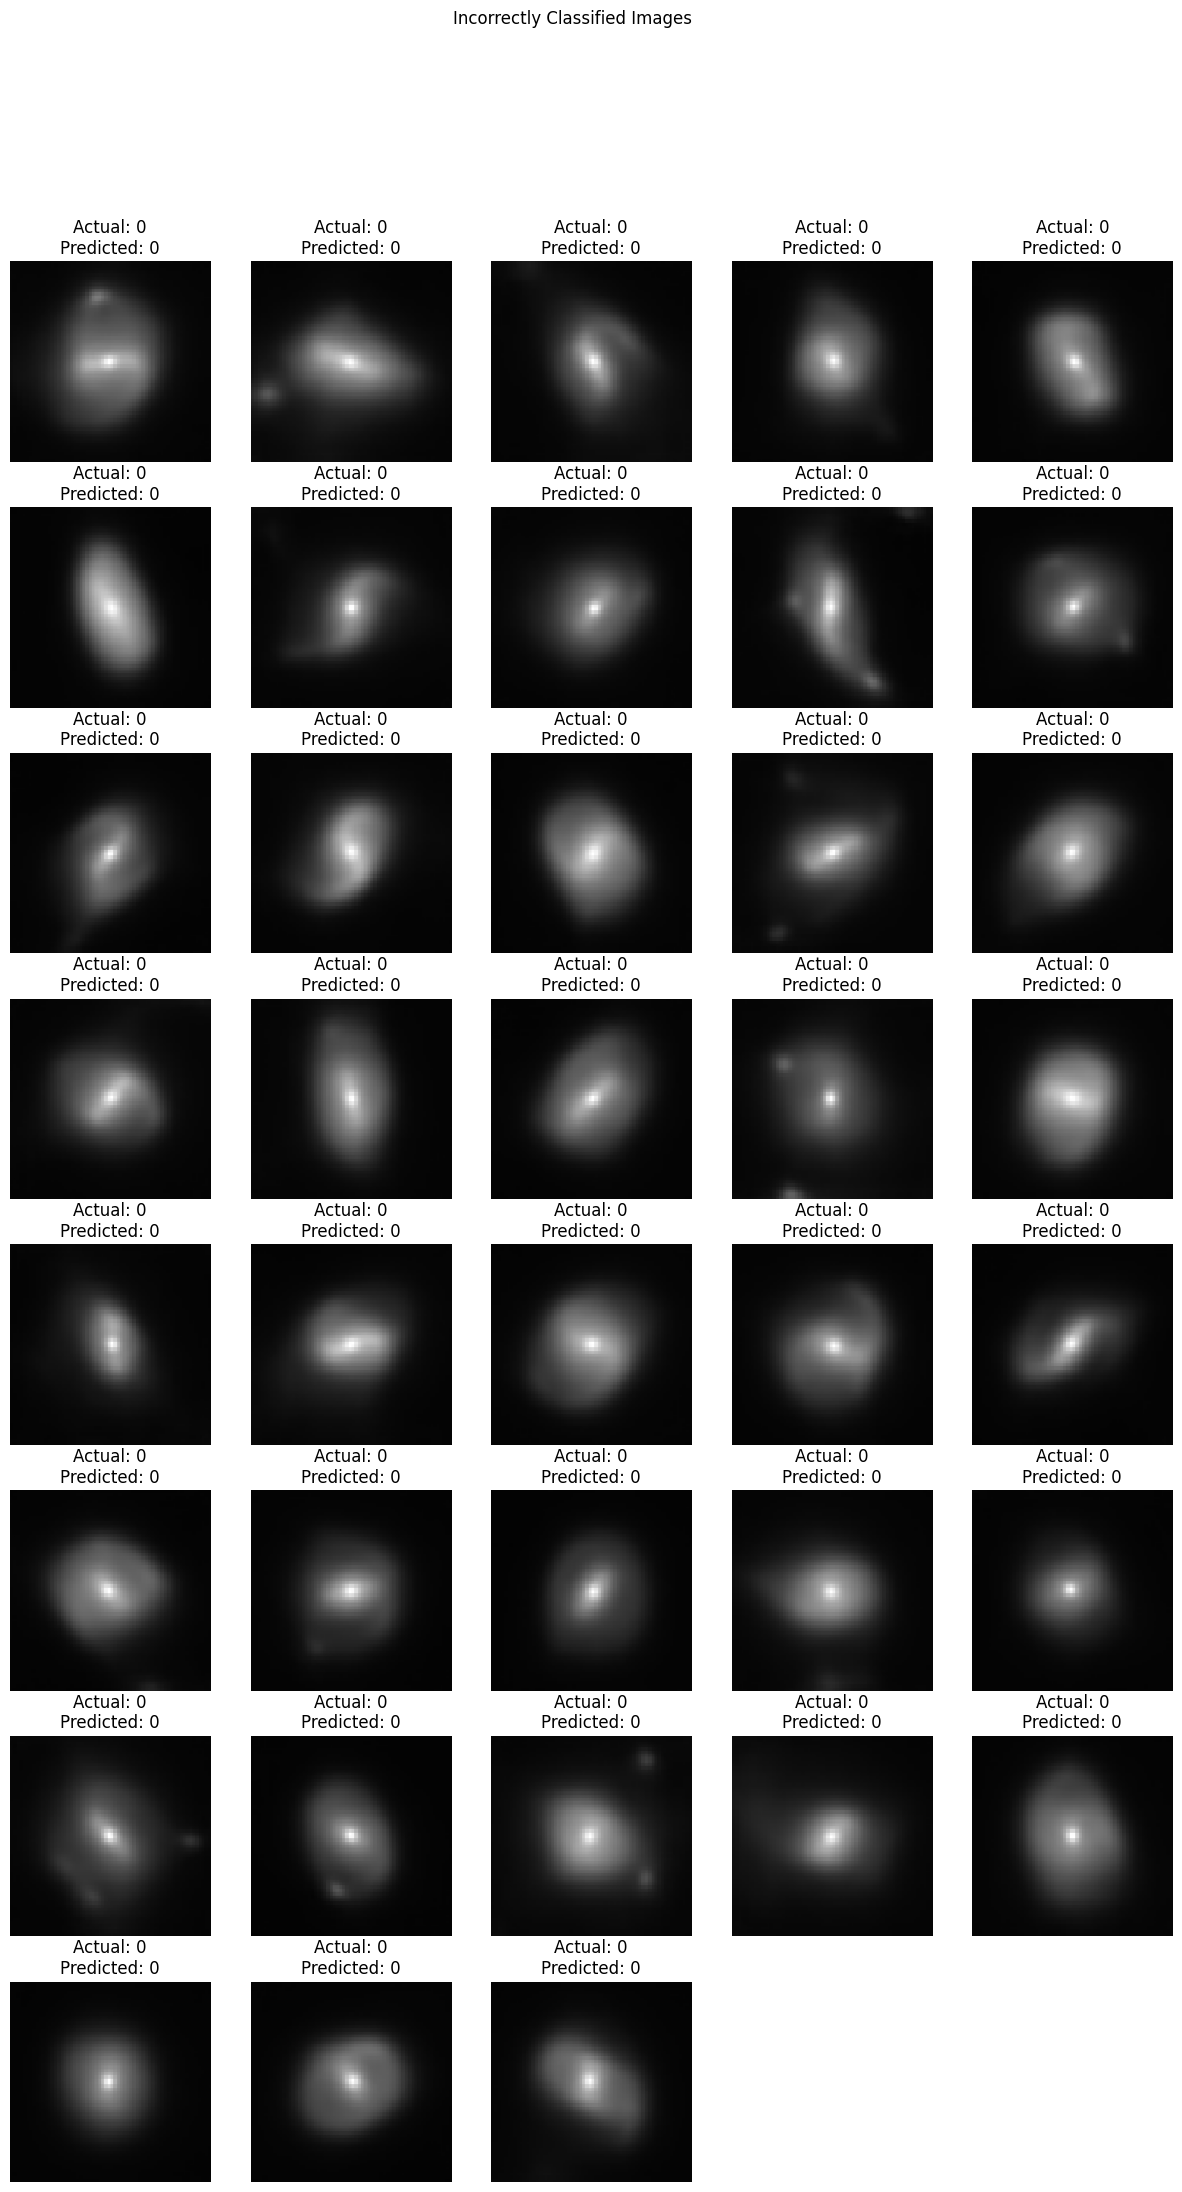

In [ ]:
incorrect_idx = np.where(test_pred[:, 0] != test_labels)[0]
plt.figure(figsize=(15, 25))
for i, idx in enumerate(incorrect_idx[:40]):
    plt.subplot(8, 5, i+1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title('Actual: {:.0f}\nPredicted: {:.0f}'.format(test_labels[idx], test_pred[idx, 0]))
plt.suptitle('Incorrectly Classified Images')
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

# model with regularization
model_1 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)


model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model_1.fit(valid,
                    steps_per_epoch=valid.samples // valid.batch_size,
                    epochs=50,
                    validation_data=test,
                    validation_steps=test.samples // test.batch_size, callbacks=[early_stop, reduce_lr])

Epoch 1/50
31/31 [==============================] - 18s 522ms/step - loss: 3.2043 - accuracy: 0.6235 - val_loss: 1.1284 - val_accuracy: 0.7236 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 16s 505ms/step - loss: 0.7680 - accuracy: 0.8957 - val_loss: 0.4456 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 15s 496ms/step - loss: 0.4280 - accuracy: 0.9758 - val_loss: 0.3362 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 4/50
31/31 [==============================] - 17s 565ms/step - loss: 0.4004 - accuracy: 0.9618 - val_loss: 0.3788 - val_accuracy: 0.9795 - lr: 0.0010
Epoch 5/50
31/31 [==============================] - 16s 525ms/step - loss: 0.3486 - accuracy: 0.9788 - val_loss: 0.2541 - val_accuracy: 0.9963 - lr: 0.0010
Epoch 6/50
31/31 [==============================] - 16s 526ms/step - loss: 0.2907 - accuracy: 0.9835 - val_loss: 0.2346 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 7/50
31/31 [==============================] - 15s 499ms/st

Text(0.5, 1.0, 'Training and Validation Loss')

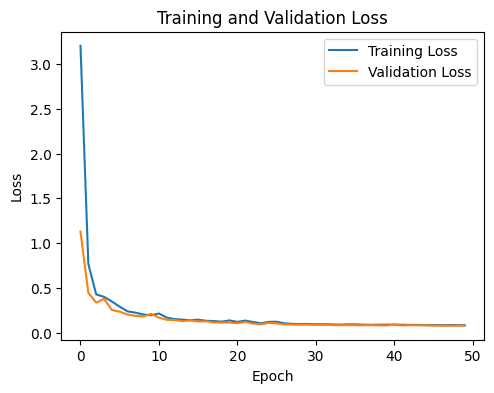

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

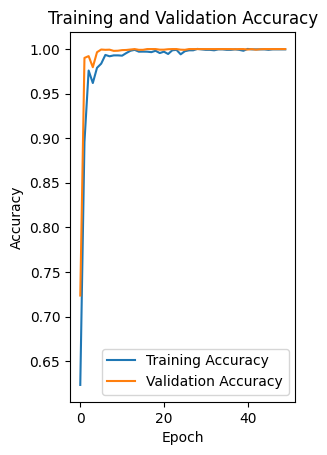

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
test_images, test_labels = next(test)
test_pred = model.predict(test_images)

2/2 [==============================] - 0s 8ms/step


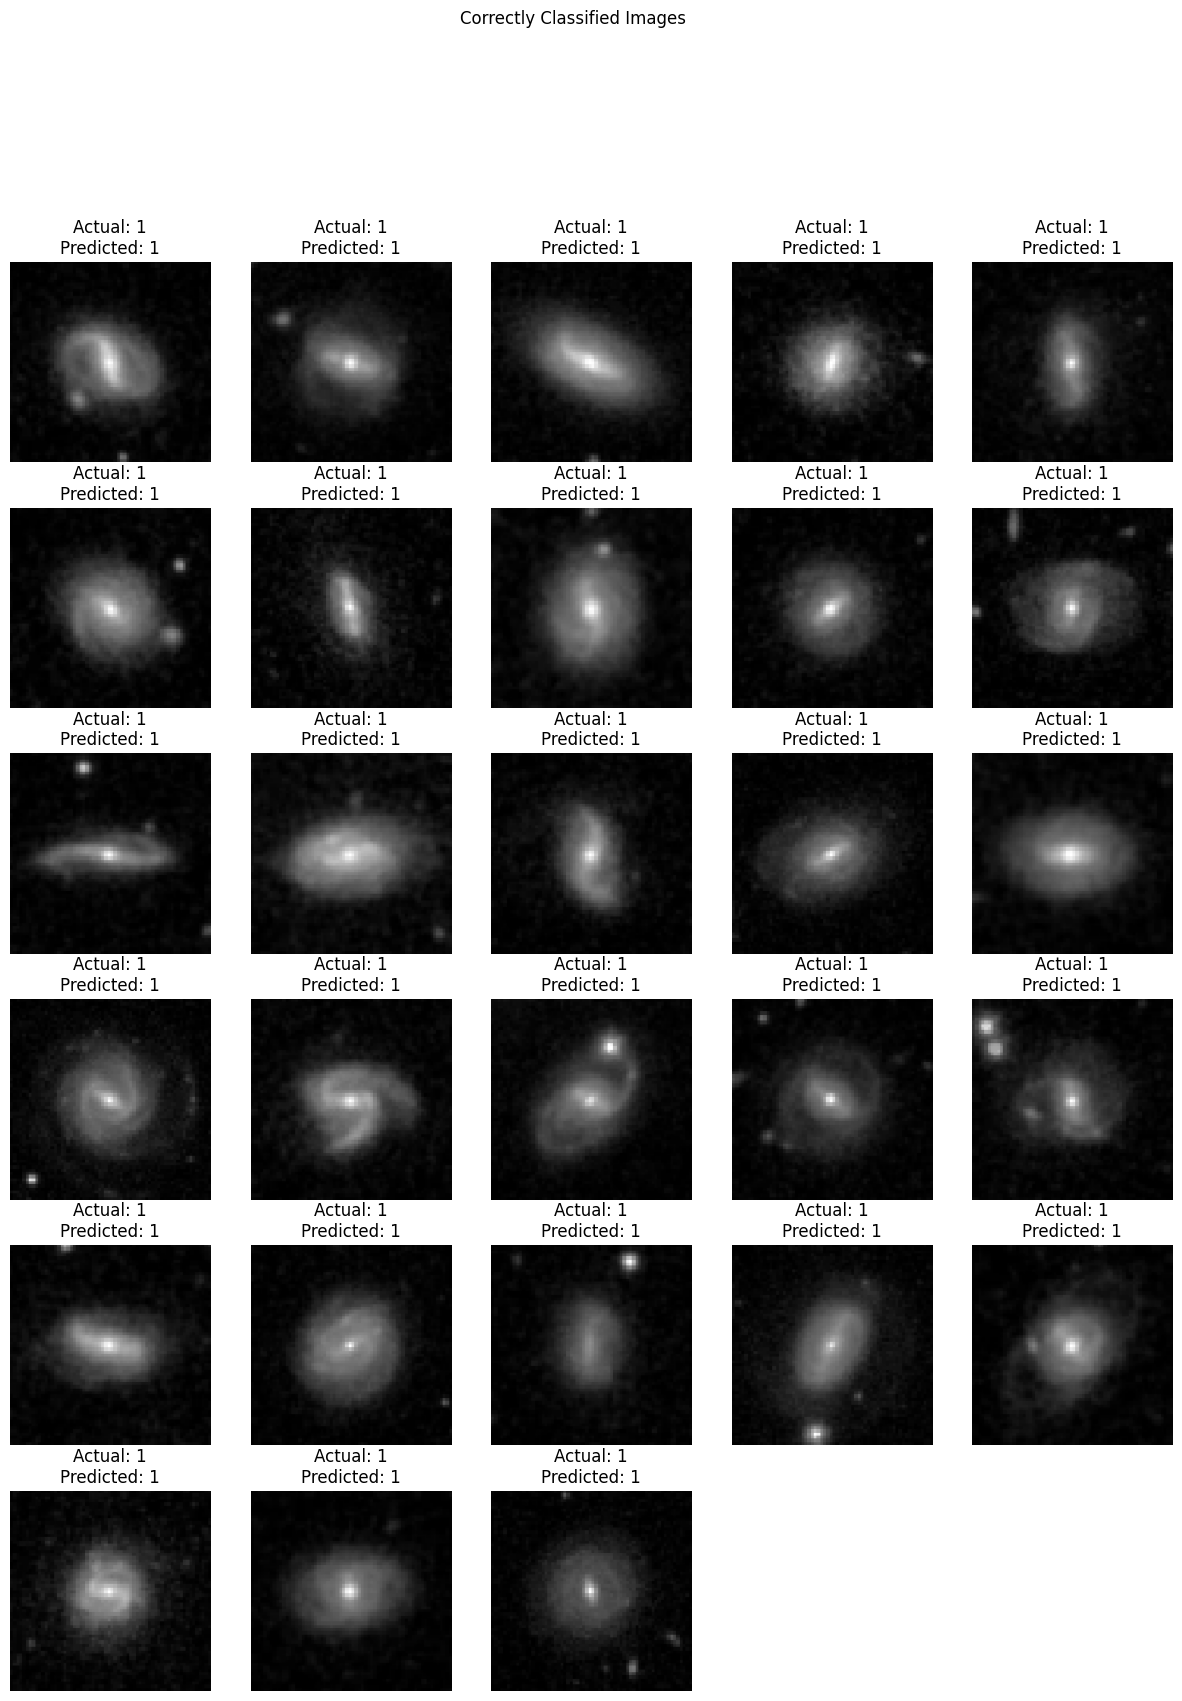

In [ ]:
correct_idx = np.where(test_pred[:, 0] == test_labels)[0]
plt.figure(figsize=(15, 25))
for i, idx in enumerate(correct_idx[:40]):
    plt.subplot(8, 5, i+1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title('Actual: {:.0f}\nPredicted: {:.0f}'.format(test_labels[idx], test_pred[idx, 0]))
plt.suptitle('Correctly Classified Images')
plt.show()

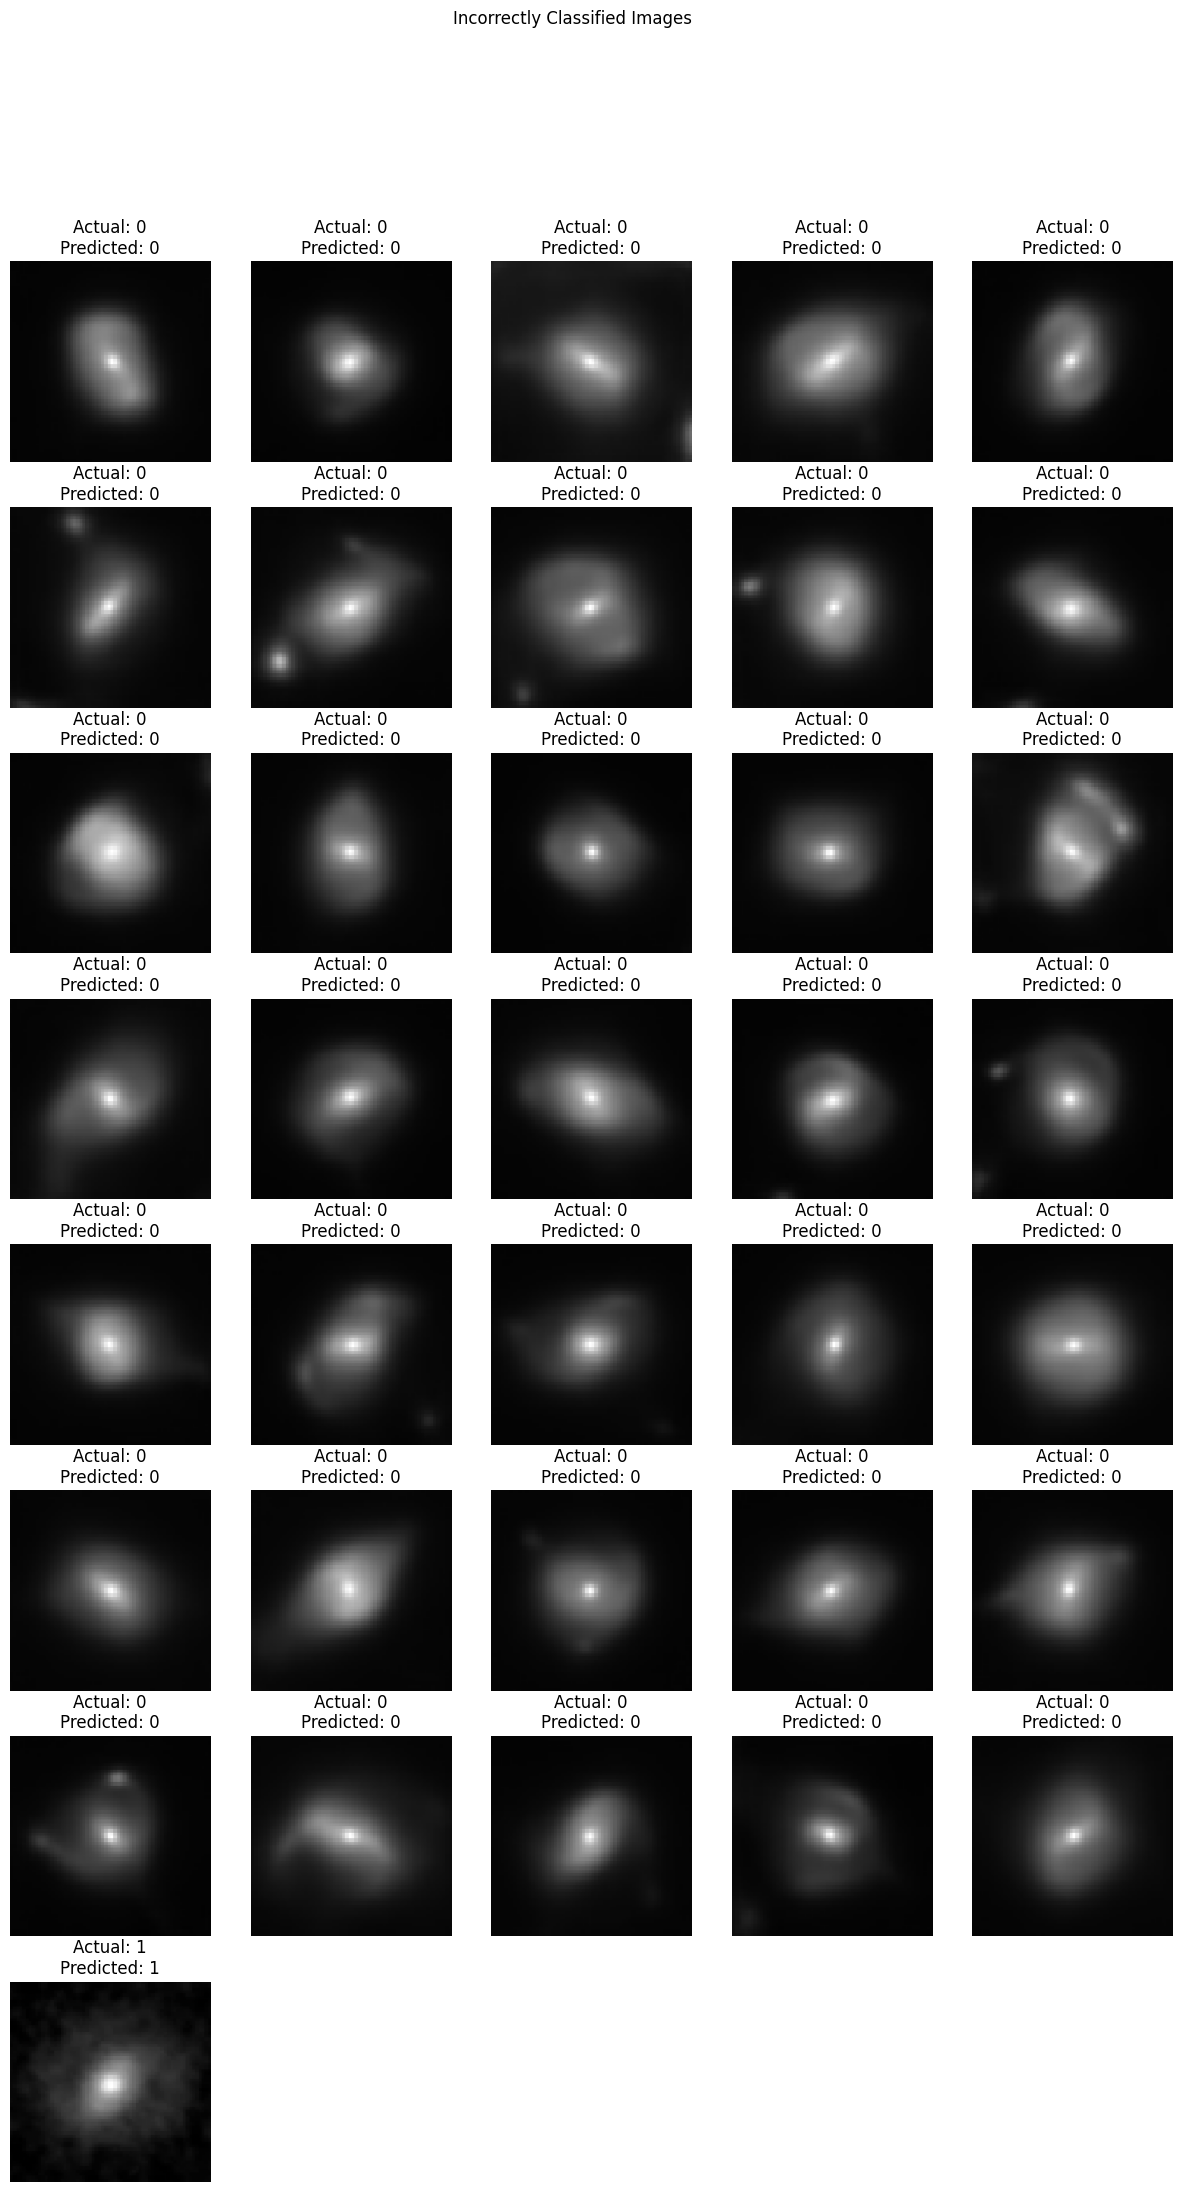

In [ ]:
incorrect_idx = np.where(test_pred[:, 0] != test_labels)[0]
plt.figure(figsize=(15, 25))
for i, idx in enumerate(incorrect_idx[:40]):
    plt.subplot(8, 5, i+1)
    plt.imshow(test_images[idx])
    plt.axis('off')
    plt.title('Actual: {:.0f}\nPredicted: {:.0f}'.format(test_labels[idx], test_pred[idx, 0]))
plt.suptitle('Incorrectly Classified Images')
plt.show()